In [1]:
# Import packages
import numpy as np
curDay = 24

# Download input file
from download_inputs import download_inputs

# download_inputs(curDay)

In [2]:
# Load input into workspace
filename = f'inputs\\day{curDay}.txt'
# curIn = np.loadtxt(filename)

inputFile = open(filename)
inputs = []
inputs = [s for s in inputFile.read().splitlines()]

print('Done loading input')

Done loading input


In [3]:
# Load test-input into workspace
filenameTest = f'inputs\\day{curDay}test.txt'

inputFileTest = open(filenameTest)
inputsTest = []
inputsTest = [s for s in inputFileTest.read().splitlines()]

print('Done loading test-input') 

Done loading test-input


In [30]:
# for p in inputsTest:
# # for p in inputs:
#     print(p)

In [31]:
# Both left and right edge can be ignored, but start and end should be included
curIn = inputsTest 
# curIn = inputs
# he = len(curIn) 
he = len(curIn) - 2 # For the storms, edges doesn't matter. Edgecases for start and end can be handled seperately
wi = len(curIn[0]) - 2

In [32]:

class Storm:
    def __init__(self,x,y,dir):
        self.x = x
        self.y = y
        self.dir = dir 
    def update(self):
        if self.dir == '>':
            self.x += 1
            self.x = (self.x % wi)
        elif self.dir == '<':
            self.x -= 1
            self.x = (self.x % wi)
        elif self.dir == '^':
            self.y -= 1
            self.y = (self.y % he)
        elif self.dir == 'v':
            self.y += 1
            self.y = (self.y % he)


In [33]:
# testStorm = Storm(2,2,'^')

# for k in range(10):
#     testStorm.update()
#     print(testStorm.y)

In [34]:
allStorms = list()
curMap = np.zeros((he,wi))
for y,a in enumerate(curIn[1:-1]):
    for x,b in enumerate(a[1:-1]):
        # print(x,y,b)
        if (b == '>') | (b == '<') | (b == 'v') | (b == '^'):
            # print(x,y,b)
            curMap[y,x] += 1
            newStorm = Storm(x,y,b)
            allStorms.append(newStorm)


In [35]:
def getIniStorms():
    iniStorms = list()
    curMap = np.zeros((he,wi))
    for y,a in enumerate(curIn[1:-1]):
        for x,b in enumerate(a[1:-1]):
            # print(x,y,b)
            if (b == '>') | (b == '<') | (b == 'v') | (b == '^'):
                # print(x,y,b)
                curMap[y,x] += 1
                newStorm = Storm(x,y,b)
                iniStorms.append(newStorm)

    return iniStorms

In [36]:
# curMap 
def showStorms(st):
    curMap = np.array( [['    ' for x in range(wi)] for y in range(he)] ) 
    for s in st:
        curText = curMap[s.y][s.x]
        
        newText = s.dir+curText
        curMap[s.y][s.x] = newText
        # print(curMap[s.y][s.x])
        # curMap[s.y][s.x] += s.dir
    
    curMap[curMap == ''] = '.'

    for a in curMap:
        print(a)

# for a in curMap:
#     print(a)
    
# showStorms(allStorms)


# showStorms(allStorms)


In [37]:
def countStorms(st):
    
    curMap = np.array( [[0 for x in range(wi)] for y in range(he)] ) 
    for s in st:
        curMap[s.y][s.x] += 1

    return curMap
# countStorms(allStorms)

In [38]:
# def getPosNei(x,y):
def getPosNei(pos):
    x,y = pos
    curCount = countStorms(allStorms)

    allNei = []
    if x > 0:
        if (curCount[y][x-1] == 0):
            newNei = [x-1,y]
            allNei.append(newNei) 
    if x < (wi-1):
        if (curCount[y][x+1] == 0):
            newNei = [x+1,y]
            allNei.append(newNei) 
    if y > 0:
        if (curCount[y-1][x] == 0):
            newNei = [x,y-1]
            allNei.append(newNei)
    if y < (he-1):
        if (curCount[y+1][x] == 0):
            newNei = [x,y+1]
            allNei.append(newNei)

    # Edge cases
    if (x==0) & (y==0):
        newNei = [0,-1]
        allNei.append(newNei)
    if (x==(wi-1)) & (y==(he-1)):
        newNei = [wi,he+1]
        allNei.append(newNei)
    return allNei 



In [39]:
# showStorms(allStorms)

In [40]:
curPos = [5,3]

getPosNei(curPos)


[[6, 5]]

In [41]:
# for i in range(wi*he):
#     print('--------------')
#     for s in allStorms:
#         s.update()
#     showStorms(allStorms)

In [42]:

# curMap = np.array( [['' for x in range(wi)] for y in range(he)] ) 
# for s in allStorms:
#     curMap[s.x][s.y] = s.dir

# curMap[curMap == ''] = '.'

# for a in curMap:
#     print(a)


# As a 3D map

In [43]:
zMax = wi*he 
zMax = np.lcm(wi,he)

fullMap = np.zeros((he,wi,zMax))
fullMap = np.zeros((he+1,wi,zMax))

allStorms = getIniStorms()
curLayer = countStorms(allStorms)

topEdge = np.ones(wi)
topEdge[0] = 0
curLayer = np.vstack([topEdge,curLayer])
fullMap[:,:,0] = curLayer


# Go through all possible forms 
for z in range(1,zMax):
    for s in allStorms:
        s.update()
    curLayer = countStorms(allStorms)
    
    topEdge = np.ones(wi)
    topEdge[0] = 0
    curLayer = np.vstack([topEdge,curLayer])
    fullMap[:,:,z] = curLayer
    

In [44]:
fullMap[:,:,0]
# # curLayer
# topEdge = np.ones(wi)
# topEdge[0] = 0
# np.vstack([topEdge,curLayer])
# fullMap[:,:,4]

array([[0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1.],
       [0., 1., 0., 0., 1., 1.],
       [1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [45]:
# def getPosMoves(x,y,z):
def getPosMoves(pos):
    x,y,z = pos
    # Always move +1 in z direction 
    # nextZ = (z+1) % zMax
    # nextLayer = fullMap[:,:,nextZ]
    nextZ = (z+1) 
    nextLayer = fullMap[:,:,nextZ % zMax]

    # print(nextLayer)

    allNei = []
    # Staying in place
    # print(nextLayer[x,y])
    if nextLayer[y,x] == 0:
        curNei = [x,y,nextZ]
        allNei.append(curNei)
    # Moving right
    if x < (wi-1):
        if nextLayer[y,x+1] == 0:
            curNei = [x+1,y,nextZ]
            allNei.append(curNei)
    # Moving left
    if x > 0:
        if nextLayer[y,x-1] == 0:
            curNei = [x-1,y,nextZ]
            allNei.append(curNei)
            
    # Moving up
    if y > 0:
        if nextLayer[y-1,x] == 0:
            curNei = [x,y-1,nextZ]
            allNei.append(curNei)
    # Moving down
    # if y < (he-1):
    if y < (he):
        # print(y)
        if nextLayer[y+1,x] == 0:
            curNei = [x,y+1,nextZ]
            allNei.append(curNei)

    # # Next to start: Allow moving to start
    # if (x == 0) & (y == 0):
    #     curNei = [0,-1,nextZ]
    #     allNei.append(curNei)
    # # On start: Stay or move to space below
    # if (x == 0) & (y == -1):
    #     # Staying
    #     curNei = [0,-1,nextZ]
    #     allNei.append(curNei)
    #     # Moving down
    #     if nextLayer[0,0] == 0:
    #         curNei = [0,0,nextZ]
    #         allNei.append(curNei)

    # Next to finish
    # if (x == (wi-1)) & (y == (he-1)):
        # curNei = [wi-1,he,nextZ]
        # allNei.append(curNei) 
    if (x == (wi-1)) & (y == (he)):
        curNei = [wi-1,he+1,nextZ]
        allNei.append(curNei) 


    return allNei 

curPos = [5,2,16]
curPos = [5,3,17]
curPos = [4,2,15]
# getPosMoves(curPos)
getPosMoves([0,0,0])

[[0, 0, 1], [0, 1, 1]]

In [46]:
# nextLayer
startPos = [0,0,0]
getPosMoves(startPos)

curPos = [0,0,0]
curPos = [0,1,1]
curPos = [0,2,2]
curPos = [0,2,3]
curPos = [0,1,4]
curPos = [1,1,5]
curPos = [2,1,6]
curPos = [2,2,7]
curPos = [1,2,8]
curPos = [5,3,16]
curPos = [5,4,17]
# curPos = [5,4,18]
getPosMoves(curPos)

[[4, 4, 18], [5, 5, 18]]

In [47]:
endPos = [wi-1,he+1]


In [48]:
def heuristic(pos):
    x,y,z = pos 
    return (wi-x) + (he-y)
    # return x + y
    # return -(wi-x) - (he-y) 
    # return x - wi

In [49]:
# from queue import PriorityQueue
# testQueue = PriorityQueue()
# testQueue.put((0,'a'))
# testQueue.put((2,'b'))
# testQueue.put((10,'c'))
# # # testQueue.put('b',10)
# # testQueue.put('c',20)
# # testQueue.put('b',10)

# testQueue.get()
# testQueue.get()
curPos

[5, 4, 17]

In [50]:
from queue import PriorityQueue

curFront = PriorityQueue()
curFront.put((0,startPos))
# curFront = list()
# curFront.append(startPos)

cameFrom = dict()
# cameFrom[startPos] = None
cameFrom[startPos[0],startPos[1],startPos[2]] = None

costSoFar = dict()
# costSoFar[startPos] = 0 
costSoFar[startPos[0],startPos[1],startPos[2]] = 0


haveReached = list()
# haveReached.append(startPos)
# haveReached.append((startPos[0],startPos[1]))
# haveReached.append(startPos[0:2]) # Add the first to
haveReached.append((startPos[0],startPos[1],startPos[2] % zMax))
haveReached


maxIter = 20000
curIter = 0
# while (len(curFront) > 0):
while not curFront.empty():

    # print(cameFrom)

    curPrio,curPos = curFront.get()
    # curPos = curFront.pop(0)

    # curIter += 1
    # if curIter > maxIter:
    #     break

    
    # if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
    if (curPos[0] == (wi-1)) & (curPos[1] == (he)):
        print(curPos)
        cameFrom[curPos[0],curPos[1]+1,curPos[2]+1] = curPos
        print('Done!')
        break 


    curNei = getPosMoves(curPos)
    # print(curPos,curNei)

    for nei in curNei:

        # if (nei[0] == 5) & (nei[1] == 5):
        #     print('Done')
        #     break
        
        toAddToHaveReached = nei.copy()
        toAddToHaveReached[2] = toAddToHaveReached[2] % zMax
        
        newCost = costSoFar[curPos[0],curPos[1],curPos[2]] + 1 
        foundInFront = False 
        # if nei in haveReached:
        if toAddToHaveReached in haveReached:
            foundInFront = True 
        if (foundInFront == False):
            costSoFar[nei[0],nei[1],nei[2]] = newCost 
            curPrio = newCost + heuristic(nei)*2 # Actually works... 
            # curPrio = newCost 
            # curPrio = newCost +heuristic(nei)
            # curPrio = heuristic(nei)

            curFront.put((curPrio,nei))
            # curFront.append(nei)
            # haveReached.append(nei)
            haveReached.append(toAddToHaveReached)
            

            cameFrom[nei[0],nei[1],nei[2]] = curPos 


[5, 4, 17]
Done!


In [51]:
# # cameFrom
# print(curPos)
# haveReached
# # curPos 
# # toAddToHaveReached = nei.copy()
# # toAddToHaveReached[2] = toAddToHaveReached[2] % zMax
# # toAddToHaveReached

In [52]:
# cameFrom
endPos = [wi-1,he+1]
thisPos = curPos.copy()
stillGoing = True 
part1 = 0
# for k in range(100):
while stillGoing:
    # print(thisPos)
    if thisPos == [0,0,0]:
        stillGoing =False
    thisPos = cameFrom[thisPos[0],thisPos[1],thisPos[2]]
    part1 += 1 
print(f'Solution to part 1: {part1}')

Solution to part 1: 18


In [53]:
# curPos
# allVisited.T[-1,:]

# len(cameFrom)

# getPosMoves(curPos)
# (119,26,436)


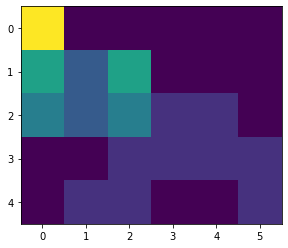

In [54]:
# haveReached
# asdfasdf
allVisited = np.zeros((wi,he+1))
# for p in haveReached:
for p in costSoFar.keys():
    allVisited[p[0],p[1]] += 1 
    
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.imshow(allVisited.T)




# Part 2
Move to end, move to start, move to end

In [55]:
def heuristic(pos):
    x,y,z = pos 
    return (wi-x) + (he-y)
def heuristicBack(pos):
    x,y,z = pos 
    return x + y

In [63]:
endPoint = [wi-1,he+1,part1]



IndexError: index 5 is out of bounds for axis 0 with size 5

In [62]:
from queue import PriorityQueue

curFront = PriorityQueue()
# curFront.put((0,startPos))
curFront.put((0,endPoint))
# curFront = list()
# curFront.append(startPos)

cameFrom = dict()
# cameFrom[startPos] = None
cameFrom[startPos[0],startPos[1],startPos[2]] = None

costSoFar = dict()
# costSoFar[startPos] = 0 
costSoFar[startPos[0],startPos[1],startPos[2]] = 0


haveReached = list()
# haveReached.append(startPos)
# haveReached.append((startPos[0],startPos[1]))
# haveReached.append(startPos[0:2]) # Add the first to
haveReached.append((startPos[0],startPos[1],startPos[2] % zMax))
haveReached


maxIter = 20000
curIter = 0
# while (len(curFront) > 0):
while not curFront.empty():

    # print(cameFrom)

    curPrio,curPos = curFront.get()
    # curPos = curFront.pop(0)

    # curIter += 1
    # if curIter > maxIter:
    #     break

    
    # if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
    if (curPos[0] == (wi-1)) & (curPos[1] == (he)):
        print(curPos)
        cameFrom[curPos[0],curPos[1]+1,curPos[2]+1] = curPos
        print('Done!')
        break 


    curNei = getPosMoves(curPos)
    # print(curPos,curNei)

    for nei in curNei:

        # if (nei[0] == 5) & (nei[1] == 5):
        #     print('Done')
        #     break
        
        toAddToHaveReached = nei.copy()
        toAddToHaveReached[2] = toAddToHaveReached[2] % zMax
        
        newCost = costSoFar[curPos[0],curPos[1],curPos[2]] + 1 
        foundInFront = False 
        # if nei in haveReached:
        if toAddToHaveReached in haveReached:
            foundInFront = True 
        if (foundInFront == False):
            costSoFar[nei[0],nei[1],nei[2]] = newCost 
            # curPrio = newCost + heuristic(nei)*2 # Actually works... 
            curPrio = newCost + heuristicBack(nei)*2 # Actually works... 
            # curPrio = newCost 
            # curPrio = newCost +heuristic(nei)
            # curPrio = heuristic(nei)

            curFront.put((curPrio,nei))
            # curFront.append(nei)
            # haveReached.append(nei)
            haveReached.append(toAddToHaveReached)
            

            cameFrom[nei[0],nei[1],nei[2]] = curPos 


IndexError: index 5 is out of bounds for axis 0 with size 5

# Old below

In [28]:
asdfasdfas

NameError: name 'asdfasdfas' is not defined

In [ ]:
# from queue import PriorityQueue

# # curFront = PriorityQueue()
# # curFront.put(startPos,0)
# curFront = list()
# curFront.append(startPos)

# cameFrom = dict()
# # cameFrom[startPos] = None
# cameFrom[startPos[0],startPos[1],startPos[2]] = None

# costSoFar = dict()
# # costSoFar[startPos] = 0 
# costSoFar[startPos[0],startPos[1],startPos[2]] = 0


# haveReached = list()
# # haveReached.append(startPos)
# # haveReached.append((startPos[0],startPos[1]))
# # haveReached.append(startPos[0:2]) # Add the first to
# haveReached.append((startPos[0],startPos[1],startPos[2] % zMax))
# haveReached


# maxIter = 200
# curIter = 0
# while (len(curFront) > 0):
# # while not curFront.empty():

#     # print(cameFrom)

#     # curPos = curFront.get()
#     curPos = curFront.pop(0)

#     curIter += 1
#     if curIter > maxIter:
#         break

    
#     # if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
#     if (curPos[0] == (wi-1)) & (curPos[1] == (he)):
#         print(curPos)
#         cameFrom[curPos[0],curPos[1]+1,curPos[2]+1] = curPos
#         print('Done!')
#         break 


#     curNei = getPosMoves(curPos)
#     # print(curPos,curNei)

#     for nei in curNei:

#         # if (nei[0] == 5) & (nei[1] == 5):
#         #     print('Done')
#         #     break
        
#         newCost = costSoFar[curPos[0],curPos[1],curPos[2]] + 1 
#         foundInFront = False 
#         if nei in haveReached:
#             foundInFront = True 
#         if (foundInFront == False):
#             costSoFar[nei[0],nei[1],nei[2]] = newCost 
#             # curPrio = newCost + heuristic(nei)
#             curPrio = newCost 
#             # curPrio = -heuristic(nei)

#             # curFront.put(nei,curPrio)
#             curFront.append(nei)
#             haveReached.append(nei)

#             cameFrom[nei[0],nei[1],nei[2]] = curPos 


[5, 5, 18]
[4, 5, 17]
[4, 4, 16]
[5, 4, 15]
[5, 5, 14]
[4, 5, 13]
[4, 5, 12]
[3, 5, 11]
[2, 5, 10]
[2, 5, 9]
[2, 4, 8]
[1, 4, 7]
[0, 4, 6]
[0, 3, 5]
[0, 3, 4]
[0, 2, 3]
[0, 2, 2]
[0, 1, 1]


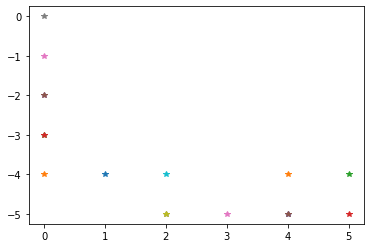

In [ ]:
# getPosMoves(curPos)
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()
curPos = [5,5,18]
for k in range(curPos[2]):
    print(curPos)
    curPos = cameFrom[curPos[0],curPos[1],curPos[2]]
    ax.plot(curPos[0],-curPos[1],'*')

# cameFrom[(5,5,18)]
cameFrom[curPos[0],curPos[1],curPos[2]]

In [ ]:
from queue import PriorityQueue

curFront = PriorityQueue()
curFront.put(startPos,0)

cameFrom = dict()
# cameFrom[startPos] = None
cameFrom[startPos[0],startPos[1],startPos[2]] = None

costSoFar = dict()
# costSoFar[startPos] = 0 
costSoFar[startPos[0],startPos[1],startPos[2]] = 0


haveReached = list()
# haveReached.append(startPos)
haveReached.append((startPos[0],startPos[1]))

maxIter = 20
curIter = 0
# while (len(curFront) > 0):
while not curFront.empty():

    # print(cameFrom)

    curPos = curFront.get()

    curIter += 1
    if curIter > maxIter:
        break

    
    if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
        print('Done!')
        break 


    curNei = getPosMoves(curPos)
    print(curPos,curNei)

    for nei in curNei:
        
        newCost = costSoFar[curPos[0],curPos[1],curPos[2]] + 1 
        foundInFront = False 
        if nei in haveReached:
            foundInFront = True 
        if (foundInFront == False):
            costSoFar[nei[0],nei[1],nei[2]] = newCost 
            # curPrio = newCost + heuristic(nei)
            # curPrio = newCost 
            # curPrio = -heuristic(nei)

            curFront.put(nei,curPrio)
            haveReached.append(nei)

            cameFrom[nei[0],nei[1],nei[2]] = curPos 


[0, 0, 0] [[0, 0, 1], [0, 1, 1]]
[0, 0, 1] [[0, 0, 2], [0, 1, 2]]
[0, 0, 2] [[0, 0, 3], [0, 1, 3]]
[0, 0, 3] [[0, 0, 4], [0, 1, 4]]
[0, 0, 4] [[0, 0, 5]]
[0, 0, 5] [[0, 0, 6], [0, 1, 6]]
[0, 0, 6] [[0, 0, 7], [0, 1, 7]]
[0, 0, 7] [[0, 0, 8], [0, 1, 8]]
[0, 0, 8] [[0, 0, 9], [0, 1, 9]]
[0, 0, 9] [[0, 0, 10], [0, 1, 10]]
[0, 0, 10] [[0, 0, 11], [0, 1, 11]]
[0, 0, 11] [[0, 0, 12], [0, 1, 12]]
[0, 0, 12] [[0, 0, 13], [0, 1, 13]]
[0, 0, 13] [[0, 0, 14], [0, 1, 14]]
[0, 0, 14] [[0, 0, 15], [0, 1, 15]]
[0, 0, 15] [[0, 0, 16]]
[0, 0, 16] [[0, 0, 17], [0, 1, 17]]
[0, 0, 17] [[0, 0, 18]]
[0, 0, 18] [[0, 0, 19]]
[0, 0, 19] [[0, 0, 20], [0, 1, 20]]


In [ ]:
# # fullMap[:,:,3]
# fullMap[:,:,0]


# for s in allStorms:
#     s.update()
# curLayer = countStorms(allStorms)
# curLayer
# np.lcm(wi,he)
# fullMap[:,:,3]
# fullMap

# Old below

In [ ]:
# def getPosMoves(x,y,z):
def getPosMoves(pos):
    x,y,z = pos
    # Always move +1 in z direction 
    # nextZ = (z+1) % zMax
    # nextLayer = fullMap[:,:,nextZ]
    nextZ = (z+1) 
    nextLayer = fullMap[:,:,nextZ % zMax]

    # print(nextLayer)

    allNei = []
    # Staying in place
    # print(nextLayer[x,y])
    if nextLayer[y,x] == 0:
        curNei = [x,y,nextZ]
        allNei.append(curNei)
    # Moving right
    if x < (wi-1):
        if nextLayer[y,x+1] == 0:
            curNei = [x+1,y,nextZ]
            allNei.append(curNei)
    # Moving left
    if x > 0:
        if nextLayer[y,x-1] == 0:
            curNei = [x-1,y,nextZ]
            allNei.append(curNei)
            
    # Moving up
    if y > 0:
        if nextLayer[y-1,x] == 0:
            curNei = [x,y-1,nextZ]
            allNei.append(curNei)
    # Moving down
    if y < (he-1):
        # print(y)
        if nextLayer[y+1,x] == 0:
            curNei = [x,y+1,nextZ]
            allNei.append(curNei)

    # Next to start: Allow moving to start
    if (x == 0) & (y == 0):
        curNei = [0,-1,nextZ]
        allNei.append(curNei)
    # On start: Stay or move to space below
    if (x == 0) & (y == -1):
        # Staying
        curNei = [0,-1,nextZ]
        allNei.append(curNei)
        # Moving down
        if nextLayer[0,0] == 0:
            curNei = [0,0,nextZ]
            allNei.append(curNei)

    # # Next to finish
    # if (x == (wi-1)) & (y == (he-1)):
    #     curNei = [wi-1,he,nextZ]
    #     allNei.append(curNei) 


    return allNei 

curPos = [5,2,16]
curPos = [5,3,17]
curPos = [4,2,15]
# getPosMoves(curPos)
# getPosMoves([0,-1,0]) 

In [ ]:
# fullMap
# fullMap[:,:,0]
# nextLayer = fullMap[:,:,17]
# nextLayer[4]

In [ ]:
startPos = [0,-1,0]
# startPos = [wi-3,he-1,0]
# startPos = [0,0,1]

In [ ]:
# haveReached == nei
# curPos[2] = 


In [ ]:
curFront = list()
curFront.append(startPos)
curFront

haveReached = list()
haveReached.append(startPos)
# haveReached.append([0,-1,2])

cameFrom = dict() 
# cameFrom[startPos] = None
cameFrom[startPos[0],startPos[1],startPos[2]] = None

maxIter = 20000
curIter = 0
while (len(curFront) > 0):

    curIter += 1
    if curIter > maxIter:
        break


    curPos = curFront.pop(0)
    curPos
    
    if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
        print('Done!')
        break 

    curNei = getPosMoves(curPos)
    # print(curNei)

    for nei in curNei:

        foundInFront = False 

        # if ((haveReached == nei).all(axis=1).any()):
        if nei in haveReached:           
            # print('asdfasdf',nei)
            foundInFront=True

        if (foundInFront == False):
            curFront.append(nei)
            haveReached.append(nei)

            cameFrom[nei[0],nei[1]] = curPos

In [ ]:
# len(curFront)
# len(haveReached)
endPos = curPos.copy()
# for k in range(10):
#     prevPos = cameFrom[curPos[0],curPos[1]]

# fullMap.shape
# cameFrom
# fullMap

In [ ]:

# for k in range(10):
#     print(curPos)
#     curPos = cameFrom[curPos[0],curPos[1]]
# cameFrom

In [ ]:
# asdfasdf
maxIter = 2000
curIter = 0
while (len(curFront) > 0):

    curIter += 1
    if curIter > maxIter:
        break


    curPos = curFront.pop(-1)
    curPos
    
    if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
        print('Done!')
        break 

    curNei = getPosMoves(curPos)
    # print(curNei)

    for nei in curNei:

        foundInFront = False 

        # if ((haveReached == nei).all(axis=1).any()):
        if nei in haveReached:           
            # print('asdfasdf',nei)
            foundInFront=True

        if (foundInFront == False):
            curFront.append(nei)
            haveReached.append(nei)

            cameFrom[nei[0],nei[1]] = curPos

In [ ]:
# b = np.int64(43)
# type(b) == int

# # np.issubdtype(b,np.integer)
# # isinstance(b,int)

# import queue

from collections import deque  


thisQueue = deque()  

In [ ]:
# tp = [50,50,0]
# heuristic(tp)
# tp = [100,20,0]
# heuristic(tp)

In [ ]:
def heuristic(pos):
    x,y,z = pos 
    return (wi-x) + (he-y)
    # return x + y
    # return -(wi-x) - (he-y) 
    # return x - wi

In [ ]:
# curFront.put(startPos,heuristic([50,50,30]))
# curFront.get()


In [ ]:
from queue import PriorityQueue

curFront = PriorityQueue()
curFront.put(startPos,0)

cameFrom = dict()
# cameFrom[startPos] = None
cameFrom[startPos[0],startPos[1],startPos[2]] = None

costSoFar = dict()
# costSoFar[startPos] = 0 
costSoFar[startPos[0],startPos[1],startPos[2]] = 0


haveReached = list()
haveReached.append(startPos)

maxIter = 20000
curIter = 0
# while (len(curFront) > 0):
while not curFront.empty():

    # print(cameFrom)

    curPos = curFront.get()

    curIter += 1
    if curIter > maxIter:
        break

    
    if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
        print('Done!')
        break 


    curNei = getPosMoves(curPos)
    # print(curNei)

    for nei in curNei:
        
        newCost = costSoFar[curPos[0],curPos[1],curPos[2]] + 1 
        foundInFront = False 
        if nei in haveReached:
            foundInFront = True 
        if (foundInFront == False):
            costSoFar[nei[0],nei[1],nei[2]] = newCost 
            # curPrio = newCost + heuristic(nei)
            curPrio = newCost 
            # curPrio = heuristic(nei)

            curFront.put(nei,curPrio)
            haveReached.append(nei)

            cameFrom[nei[0],nei[1],nei[2]] = curPos 

        # foundInFront = False 
        # # if ((haveReached == nei).all(axis=1).any()):
        # if nei in haveReached:           
        #     # print('asdfasdf',nei)
        #     foundInFront=True

        # if (foundInFront == False):
        #     curFront.append(nei)
        #     haveReached.append(nei)

        #     cameFrom[nei[0],nei[1]] = curPos
    

In [ ]:
# haveReached

In [ ]:
from queue import PriorityQueue

curFront = PriorityQueue()
curFront.put(startPos,0)

cameFrom = dict()
# cameFrom[startPos] = None
cameFrom[startPos[0],startPos[1],startPos[2]] = None

costSoFar = dict()
# costSoFar[startPos] = 0 
costSoFar[startPos[0],startPos[1],startPos[2]] = 0


haveReached = list()
haveReached.append(startPos)

maxIter = 20
curIter = 0
# while (len(curFront) > 0):
while not curFront.empty():

    # print(cameFrom)

    curPos = curFront.get()

    curIter += 1
    if curIter > maxIter:
        break

    
    if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
        print('Done!')
        break 


    curNei = getPosMoves(curPos)
    print(curPos,curNei)

    for nei in curNei:
        
        newCost = costSoFar[curPos[0],curPos[1],curPos[2]] + 1 
        foundInFront = False 
        if nei in haveReached:
            foundInFront = True 
        if (foundInFront == False):
            costSoFar[nei[0],nei[1],nei[2]] = newCost 
            # curPrio = newCost + heuristic(nei)
            # curPrio = newCost 
            # curPrio = -heuristic(nei)

            curFront.put(nei,curPrio)
            haveReached.append(nei)

            cameFrom[nei[0],nei[1],nei[2]] = curPos 


[0, -1, 0] [[0, 0, 1], [0, -1, 1], [0, 0, 1]]
[0, -1, 1] [[0, -1, 2], [0, 0, 2], [0, -1, 2], [0, 0, 2]]
[0, -1, 2] [[0, -1, 3], [1, -1, 3], [0, -1, 3]]
[0, -1, 3] [[0, -1, 4], [0, 0, 4], [0, -1, 4], [0, 0, 4]]
[0, -1, 4] [[0, -1, 5], [0, -1, 5]]
[0, -1, 5] [[1, -1, 6], [0, -1, 6]]
[0, -1, 6] [[1, -1, 7], [0, 0, 7], [0, -1, 7], [0, 0, 7]]
[0, -1, 7] [[0, -1, 8], [0, 0, 8], [0, -1, 8], [0, 0, 8]]
[0, -1, 8] [[0, -1, 9], [0, -1, 9]]
[0, -1, 9] [[0, -1, 10], [1, -1, 10], [0, 0, 10], [0, -1, 10], [0, 0, 10]]
[0, -1, 10] [[0, -1, 11], [0, -1, 11]]
[0, -1, 11] [[0, -1, 0]]
[0, 0, 1] [[0, 0, 2], [0, 1, 2], [0, -1, 2]]
[0, 0, 2] [[0, 1, 3], [0, -1, 3]]
[0, 0, 4] [[1, 0, 5], [0, -1, 5]]
[0, 0, 7] [[0, 0, 8], [0, 1, 8], [0, -1, 8]]
[0, 0, 8] [[1, 0, 9], [0, 1, 9], [0, -1, 9]]
[0, 0, 10] [[0, -1, 11]]
[0, 1, 2] [[0, 1, 3]]
[0, 1, 3] [[0, 0, 4]]


In [ ]:
haveReached


[[0, -1, 0], [0, 0, 1], [0, -1, 1], [0, -1, 2], [0, 0, 2]]

In [ ]:
endPos = curPos.copy()

In [ ]:
curPos = endPos.copy()
for k in range(18):
    print(curPos,20-k)
    curPos = cameFrom[curPos[0],curPos[1],curPos[2]]


[4, 2, 3] 20
[3, 2, 2] 19
[2, 2, 1] 18
[2, 1, 0] 17
[2, 0, 11] 16
[2, 0, 10] 15
[1, 0, 9] 14
[0, 0, 8] 13
[0, -1, 7] 12
[0, -1, 6] 11
[0, -1, 5] 10
[0, -1, 4] 9
[0, -1, 3] 8
[0, -1, 2] 7
[0, -1, 1] 6
[0, -1, 0] 5
None 4


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# cameFrom(curPos)
# curPos
# he 
# fullMap
cameFrom
    # if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
    #     print('Done!')
    #     break 

{(0, -1, 0): None,
 (0, 0, 1): [0, -1, 0],
 (0, -1, 1): [0, -1, 0],
 (0, -1, 2): [0, -1, 1],
 (0, 0, 2): [0, -1, 1],
 (0, -1, 3): [0, -1, 2],
 (1, -1, 3): [0, -1, 2],
 (0, -1, 4): [0, -1, 3],
 (0, 0, 4): [0, -1, 3],
 (0, -1, 5): [0, -1, 4],
 (1, -1, 6): [0, -1, 5],
 (0, -1, 6): [0, -1, 5],
 (1, -1, 7): [0, -1, 6],
 (0, 0, 7): [0, -1, 6],
 (0, -1, 7): [0, -1, 6],
 (0, -1, 8): [0, -1, 7],
 (0, 0, 8): [0, -1, 7],
 (0, -1, 9): [0, -1, 8],
 (0, -1, 10): [0, -1, 9],
 (1, -1, 10): [0, -1, 9],
 (0, 0, 10): [0, -1, 9],
 (0, -1, 11): [0, -1, 10],
 (0, 1, 2): [0, 0, 1],
 (0, 1, 3): [0, 0, 2],
 (1, 0, 5): [0, 0, 4],
 (0, 1, 8): [0, 0, 7],
 (1, 0, 9): [0, 0, 8],
 (0, 1, 9): [0, 0, 8],
 (2, -1, 7): [1, -1, 6],
 (2, -1, 11): [1, -1, 10],
 (2, 0, 6): [1, 0, 5],
 (2, 0, 10): [1, 0, 9],
 (2, 0, 0): [2, -1, 11],
 (3, 0, 1): [2, 0, 0],
 (2, 1, 1): [2, 0, 0],
 (2, 1, 7): [2, 0, 6],
 (2, 0, 11): [2, 0, 10],
 (2, 1, 0): [2, 0, 11],
 (1, 1, 1): [2, 1, 0],
 (2, 2, 1): [2, 1, 0],
 (1, 1, 8): [2, 1, 7],
 (3, 2, 

In [ ]:
# # curFront.empty()
# # cameFrom
# # costSoFar
# asdf = curFront.get()
# print(asdf)
# heuristic(asdf)

tp = [50,0,0]
pr = heuristic(tp)
curFront.put(tp,pr)
tp = [150,0,0]
pr = heuristic(tp)
curFront.put(tp,pr)

# curFront.get()

# curFront.get()
# curFront.put([50,0,0],)

In [ ]:
# heuristic([3,7,376])
curFront.get(False)
# curFront.get()

[4, 3, 3]

In [ ]:
# curFront.put(startPos,300000)

In [ ]:
# curFront.get()

In [ ]:
# heuristic(asdf[0]+1,asdf[1]+4 + 3)

In [ ]:
# curFront = deque()
# curFront.append(startPos)
# curFront

# haveReached = list()
# haveReached.append(startPos)
# # haveReached.append([0,-1,2])

# cameFrom = dict() 
# # cameFrom[startPos] = None
# cameFrom[startPos[0],startPos[1],startPos[2]] = None

# maxIter = 20000
# curIter = 0
# while (len(curFront) > 0):

#     curIter += 1
#     if curIter > maxIter:
#         break


#     # curPos = curFront.pop(0)
#     curPos = curFront.popleft()
#     curPos
    
#     if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
#         print('Done!')
#         break 

#     curNei = getPosMoves(curPos)
#     # print(curNei)

#     for nei in curNei:

#         foundInFront = False 

#         # if ((haveReached == nei).all(axis=1).any()):
#         if nei in haveReached:           
#             # print('asdfasdf',nei)
#             foundInFront=True

#         if (foundInFront == False):
#             curFront.append(nei)
#             haveReached.append(nei)

#             cameFrom[nei[0],nei[1]] = curPos

In [ ]:

# maxIter = 20000
# curIter = 0
# while (len(curFront) > 0):

#     curIter += 1
#     if curIter > maxIter:
#         break


#     # curPos = curFront.pop(0)
#     curPos = curFront.popleft()
#     curPos
    
#     if (curPos[0] == (wi-2)) & (curPos[1] == (he-2)):
#         print('Done!')
#         break 

#     curNei = getPosMoves(curPos)
#     # print(curNei)

#     for nei in curNei:

#         foundInFront = False 

#         # if ((haveReached == nei).all(axis=1).any()):
#         if nei in haveReached:           
#             # print('asdfasdf',nei)
#             foundInFront=True

#         if (foundInFront == False):
#             curFront.append(nei)
#             haveReached.append(nei)

#             cameFrom[nei[0],nei[1]] = curPos

# print(len(haveReached))

In [ ]:
# costSoFar

In [ ]:
# haveReached
# asdfasdf
allVisited = np.zeros((wi,he))
# for p in haveReached:
for p in costSoFar.keys():
    allVisited[p[0],p[1]] += 1 

In [ ]:
# allVisited
# fullMap.shape 
# # haveReached
# # inputs

array([[ 6.,  6.,  2., 18.],
       [ 2.,  3.,  2.,  8.],
       [ 4.,  4.,  2.,  6.],
       [ 3.,  2.,  1.,  1.],
       [ 2.,  2.,  1.,  1.],
       [ 2.,  0.,  0.,  0.]])

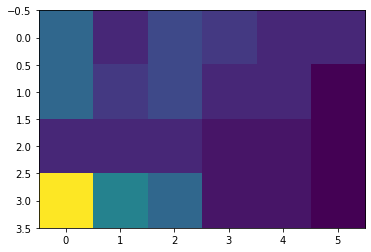

In [ ]:
# haveReached
# asdfasdf
allVisited = np.zeros((wi,he))
# for p in haveReached:
for p in costSoFar.keys():
    allVisited[p[0],p[1]] += 1 
    
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.imshow(allVisited.T)



In [ ]:
# asasdfasdfasdf
# for s in allStorms:
#     s.update()
# curLayer = countStorms(allStorms)
# fullMap[:,:,0] = curLayer

# # for i in range(wi*he):
# #     print('--------------')
# #     for s in allStorms:
# #         s.update()
# #     showStorms(allStorms)


NameError: name 'asasdfasdfasdf' is not defined

In [ ]:

# for s in allStorms:
#     s.update()

# curLayer = countStorms(allStorms)
# curLayer
# fullMap[:,:,0] = curLayer
# fullMap[:,:,]


array([[1., 2., 0., 1., 0., 1.],
       [0., 2., 1., 1., 2., 1.],
       [1., 0., 0., 1., 2., 1.],
       [1., 0., 0., 0., 0., 1.]])

In [ ]:
# zMax = wi*he 

# fullMap = np.zeros((he,wi,zMax))
# # fullMap
# curLayer = countStorms(allStorms)

# fullMap[:,:,0] = curLayer

In [ ]:
fullMap[:,:,1]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])